<a href="https://colab.research.google.com/github/afifamir/job-recommender/blob/main/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task One: Data Analysis**

**Preprocess dataset**

This notebook involves two datasets that we'll combine and conduct exploratory data analysis on the resulting merged dataset, referred to as 'merged_data'.

In [1]:
# Install gdown to download or upload file to Google Drive
!pip install gdown

This represents the initial dataset formatted as a JSON file.

In [2]:
import pandas as pd
import gdown

# Define the Google Drive file ID
file_id = '1nE4M50QS3vfDI5IHcPN184q_siyE-Ojr'

# Define the URL
url = f'https://drive.google.com/uc?id={file_id}'

# Define the output file path
output_file = 'data.json'

# Download the file from Google Drive
gdown.download(url, output_file, quiet=False)

# Read the JSON file into a DataFrame
df = pd.read_json(output_file, lines=True)

# Display the DataFrame
df

Downloading...
From (original): https://drive.google.com/uc?id=1nE4M50QS3vfDI5IHcPN184q_siyE-Ojr
From (redirected): https://drive.google.com/uc?id=1nE4M50QS3vfDI5IHcPN184q_siyE-Ojr&confirm=t&uuid=fe2b58a7-48f6-467d-8ab2-e9209fce0cbd
To: /content/data.json
100%|██████████| 150M/150M [00:02<00:00, 53.4MB/s]


,id,title,abstract,content,metadata
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,{'standout': {'bullet1': 'Join a Sector that i...
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,{'additionalSalaryText': 'Attractive Commissio...
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"{'standout': {'bullet1': 'Design, develop, tes..."
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,{'additionalSalaryText': '$140k + Car Park - C...
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,{'standout': {'bullet1': 'Lead overarching str...
...,...,...,...,...,...
49995,38836927,Data Analyst,"Data Analyst with Adobe Suite, Analytics and T...",<HTML><strong>The Company</strong><br> I am wo...,{'classification': {'name': 'Information & Com...
49996,38894517,Regional Coordinator - Goldfields,WAPHA > Health Industry - Planning and commiss...,<HTML><p><strong>About Us</strong></p> <p>WA P...,{'classification': {'name': 'Healthcare & Medi...
49997,38854483,Warehouse Coordinator,Temporary to permanent opportunity with a fant...,"<HTML><div><em>Our client, a Global leader in ...","{'classification': {'name': 'Manufacturing, Tr..."
49998,38905179,Expression of Interest - Civil Labourer,Our clients are looking for an experienced Civ...,<HTML><p><strong>Expression of Interest - Civi...,{'classification': {'name': 'Trades & Services...


Upon observation, we discovered that the '**content**' column contains HTML code, necessitating cleaning. As a solution, we opted to utilize **'BeautifulSoup'**.

In [3]:
# Function to clean HTML from a column
from bs4 import BeautifulSoup

def clean_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Clean HTML from the 'content' column
df['content'] = df['content'].apply(clean_html)

We identified the utility of the items within the 'metadata' column. Consequently, we resolved to expand this column into its individual columns.

In [4]:
# Expand the metadata in JSON format
df2 = pd.json_normalize(df['metadata'])
df2


,additionalSalaryText,standout.bullet1,standout.bullet2,standout.bullet3,classification.name,subClassification.name,location.name,workType.name,area.name,suburb.name
0,commission,Join a Sector that is considered Recession Pro...,Excellent opportunity for Career Progression ...,Make a Diference whilst earning Money and havi...,Education & Training,Other,Sydney,Full Time,NaN,NaN
1,Attractive Commission - Uncapped Earning Poten...,NaN,NaN,NaN,Retail & Consumer Products,Retail Assistants,Melbourne,Casual/Vacation,Northern Suburbs,Coburg
2,NaN,"Design, develop, test and deliver custom softw...",Keep your skills current with 20 x paid profes...,Flexible & inclusive work environment,Information & Communication Technology,Consultants,Adelaide,Full Time,NaN,NaN
3,$140k + Car Park - Call James Calleja 0430 058...,NaN,NaN,NaN,Real Estate & Property,"Commercial Sales, Leasing & Property Mgmt",Melbourne,Full Time,CBD & Inner Suburbs,Melbourne
4,$110k - $120k p.a. + Numerous Perks!,Lead overarching strategy around Technology wi...,You will be responsible for all Technology and...,Competitive Salary package of $110K - $120K + ...,Information & Communication Technology,Management,Auckland,Full Time,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
49995,NaN,NaN,NaN,NaN,Information & Communication Technology,Business/Systems Analysts,Sydney,Full Time,"CBD, Inner West & Eastern Suburbs",Sydney
49996,NaN,NaN,NaN,NaN,Healthcare & Medical,Other,Perth,Full Time,NaN,North Perth
49997,NaN,NaN,NaN,NaN,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Melbourne,Full Time,Bayside & South Eastern Suburbs,NaN
49998,NaN,NaN,NaN,NaN,Trades & Services,Labourers,Coffs Harbour & North Coast,Casual/Vacation,NaN,Coffs Harbour


In [5]:
# Merge/concatenate dataset from df & df2 (containing metadata)
ads = pd.concat([df.drop(columns='metadata'), df2], axis=1)
ads


,id,title,abstract,content,additionalSalaryText,standout.bullet1,standout.bullet2,standout.bullet3,classification.name,subClassification.name,location.name,workType.name,area.name,suburb.name
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,Are you looking to join a thriving business th...,commission,Join a Sector that is considered Recession Pro...,Excellent opportunity for Career Progression ...,Make a Diference whilst earning Money and havi...,Education & Training,Other,Sydney,Full Time,NaN,NaN
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,· Casual hours as required (transition to Par...,Attractive Commission - Uncapped Earning Poten...,NaN,NaN,NaN,Retail & Consumer Products,Retail Assistants,Melbourne,Casual/Vacation,Northern Suburbs,Coburg
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,Readify helps organizations innovate with tech...,NaN,"Design, develop, test and deliver custom softw...",Keep your skills current with 20 x paid profes...,Flexible & inclusive work environment,Information & Communication Technology,Consultants,Adelaide,Full Time,NaN,NaN
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,WayPoint Recruitment have partnered up with a ...,$140k + Car Park - Call James Calleja 0430 058...,NaN,NaN,NaN,Real Estate & Property,"Commercial Sales, Leasing & Property Mgmt",Melbourne,Full Time,CBD & Inner Suburbs,Melbourne
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,This is a key role within a market leading Tra...,$110k - $120k p.a. + Numerous Perks!,Lead overarching strategy around Technology wi...,You will be responsible for all Technology and...,Competitive Salary package of $110K - $120K + ...,Information & Communication Technology,Management,Auckland,Full Time,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,38836927,Data Analyst,"Data Analyst with Adobe Suite, Analytics and T...",The Company I am working with a highly reputab...,NaN,NaN,NaN,NaN,Information & Communication Technology,Business/Systems Analysts,Sydney,Full Time,"CBD, Inner West & Eastern Suburbs",Sydney
49996,38894517,Regional Coordinator - Goldfields,WAPHA > Health Industry - Planning and commiss...,About Us WA Primary Health Alliance (WAPHA) is...,NaN,NaN,NaN,NaN,Healthcare & Medical,Other,Perth,Full Time,NaN,North Perth
49997,38854483,Warehouse Coordinator,Temporary to permanent opportunity with a fant...,"Our client, a Global leader in the Healthcare ...",NaN,NaN,NaN,NaN,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Melbourne,Full Time,Bayside & South Eastern Suburbs,NaN
49998,38905179,Expression of Interest - Civil Labourer,Our clients are looking for an experienced Civ...,Expression of Interest - Civil Labourers Lab...,NaN,NaN,NaN,NaN,Trades & Services,Labourers,Coffs Harbour & North Coast,Casual/Vacation,NaN,Coffs Harbour


In [6]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      50000 non-null  int64 
 1   title                   50000 non-null  object
 2   abstract                50000 non-null  object
 3   content                 50000 non-null  object
 4   additionalSalaryText    16349 non-null  object
 5   standout.bullet1        26685 non-null  object
 6   standout.bullet2        26685 non-null  object
 7   standout.bullet3        26685 non-null  object
 8   classification.name     50000 non-null  object
 9   subClassification.name  50000 non-null  object
 10  location.name           50000 non-null  object
 11  workType.name           50000 non-null  object
 12  area.name               32844 non-null  object
 13  suburb.name             37002 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.3+ MB


In [7]:
# Rename few column names
ads.columns = ads.columns.str.replace('.', '_')
ads.columns


<ipython-input-7-8d24d011b967>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ads.columns = ads.columns.str.replace('.', '_')


Index(['id', 'title', 'abstract', 'content', 'additionalSalaryText',
       'standout_bullet1', 'standout_bullet2', 'standout_bullet3',
       'classification_name', 'subClassification_name', 'location_name',
       'workType_name', 'area_name', 'suburb_name'],
      dtype='object')

In [8]:
from google.colab import drive

drive.mount('/content/drive')

filename = 'ads.csv'

ads.to_csv('/content/drive/My Drive/' + filename)


Mounted at /content/drive


In [9]:
# Define the Google Drive file ID
file_id = '1uMVS6x1Sy0iVIP546ntaSe24FEc3y3L1'

# Define the URL
url = f'https://drive.google.com/uc?id={file_id}'

# Define the output file path
output_file = 'ads-50k-events.csv'

# Download the file from Google Drive
gdown.download(url, output_file, quiet=False)

# Read the JSON file into a DataFrame
events = pd.read_csv(output_file)

# Display the DataFrame
events


Downloading...
From (original): https://drive.google.com/uc?id=1uMVS6x1Sy0iVIP546ntaSe24FEc3y3L1
From (redirected): https://drive.google.com/uc?id=1uMVS6x1Sy0iVIP546ntaSe24FEc3y3L1&confirm=t&uuid=eb9c6d12-bb66-478c-b85d-39eabd687bbf
To: /content/ads-50k-events.csv
100%|██████████| 192M/192M [00:04<00:00, 45.1MB/s]


,event_datetime,resume_id,job_id,event_platform,kind
0,2021-05-01T08:42:05,158655,38820886,IOS_APP,V
1,2021-05-01T08:42:05,158655,38901970,IOS_APP,V
2,2021-05-01T08:42:05,158655,38919645,IOS_APP,V
3,2021-05-01T08:42:05,158655,38928402,IOS_APP,V
4,2021-05-01T08:42:05,158655,38847632,IOS_APP,V
...,...,...,...,...,...
4304683,2021-05-01T03:34:41,97605,38984280,WEB,V
4304684,2021-05-01T03:34:41,97605,38977257,WEB,V
4304685,2021-05-01T03:34:41,97605,38943585,WEB,V
4304686,2021-05-01T03:34:41,97605,38864861,WEB,V


In [10]:
# Define the Google Drive file ID
file_id = '1_BQPCMaOu0sJn93MJgSNSe87HmJv41fd'

# Define the URL
url = f'https://drive.google.com/uc?id={file_id}'

# Define the output file path
output_file = 'ads.csv'

# Download the file from Google Drive
gdown.download(url, output_file, quiet=False)

# Read the csv file into a DataFrame
ads = pd.read_csv(output_file)

# Display the DataFrame
#final_df.drop(final_df.columns[final_df.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)

ads.drop(ads.columns[ads.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)


Downloading...
From (original): https://drive.google.com/uc?id=1_BQPCMaOu0sJn93MJgSNSe87HmJv41fd
From (redirected): https://drive.google.com/uc?id=1_BQPCMaOu0sJn93MJgSNSe87HmJv41fd&confirm=t&uuid=7610eb0a-f39d-4725-89d5-759dbe32d979
To: /content/ads.csv
100%|██████████| 120M/120M [00:02<00:00, 54.8MB/s]


In [11]:
ads

,id,title,abstract,content,additionalSalaryText,standout_bullet1,standout_bullet2,standout_bullet3,classification_name,subClassification_name,location_name,workType_name,area_name,suburb_name
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,Are you looking to join a thriving business th...,commission,Join a Sector that is considered Recession Pro...,Excellent opportunity for Career Progression ...,Make a Diference whilst earning Money and havi...,Education & Training,Other,Sydney,Full Time,NaN,NaN
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,· Casual hours as required (transition to Par...,Attractive Commission - Uncapped Earning Poten...,NaN,NaN,NaN,Retail & Consumer Products,Retail Assistants,Melbourne,Casual/Vacation,Northern Suburbs,Coburg
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,Readify helps organizations innovate with tech...,NaN,"Design, develop, test and deliver custom softw...",Keep your skills current with 20 x paid profes...,Flexible & inclusive work environment,Information & Communication Technology,Consultants,Adelaide,Full Time,NaN,NaN
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,WayPoint Recruitment have partnered up with a ...,$140k + Car Park - Call James Calleja 0430 058...,NaN,NaN,NaN,Real Estate & Property,"Commercial Sales, Leasing & Property Mgmt",Melbourne,Full Time,CBD & Inner Suburbs,Melbourne
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,This is a key role within a market leading Tra...,$110k - $120k p.a. + Numerous Perks!,Lead overarching strategy around Technology wi...,You will be responsible for all Technology and...,Competitive Salary package of $110K - $120K + ...,Information & Communication Technology,Management,Auckland,Full Time,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50012,38836927,Data Analyst,"Data Analyst with Adobe Suite, Analytics and T...",The Company I am working with a highly reputab...,NaN,NaN,NaN,NaN,Information & Communication Technology,Business/Systems Analysts,Sydney,Full Time,"CBD, Inner West & Eastern Suburbs",Sydney
50013,38894517,Regional Coordinator - Goldfields,WAPHA > Health Industry - Planning and commiss...,About Us WA Primary Health Alliance (WAPHA) is...,NaN,NaN,NaN,NaN,Healthcare & Medical,Other,Perth,Full Time,NaN,North Perth
50014,38854483,Warehouse Coordinator,Temporary to permanent opportunity with a fant...,"Our client, a Global leader in the Healthcare ...",NaN,NaN,NaN,NaN,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Melbourne,Full Time,Bayside & South Eastern Suburbs,NaN
50015,38905179,Expression of Interest - Civil Labourer,Our clients are looking for an experienced Civ...,Expression of Interest - Civil Labourers Lab...,NaN,NaN,NaN,NaN,Trades & Services,Labourers,Coffs Harbour & North Coast,Casual/Vacation,NaN,Coffs Harbour


In [12]:
print("Data types in 'events' DataFrame:")
print(events.dtypes)
print("\nData types in 'ads' DataFrame:")
print(ads.dtypes)

Data types in 'events' DataFrame:
event_datetime    object
resume_id          int64
job_id             int64
event_platform    object
kind              object
dtype: object

Data types in 'ads' DataFrame:
id                        object
title                     object
abstract                  object
content                   object
additionalSalaryText      object
standout_bullet1          object
standout_bullet2          object
standout_bullet3          object
classification_name       object
subClassification_name    object
location_name             object
workType_name             object
area_name                 object
suburb_name               object
dtype: object


The '**job_id**' column in the '**events**' dataset corresponds to the '**id**' column in the '**ads**' dataset, but they have different data types. Consequently, we opted to convert the data type of the '**id**' column to integer.



In [13]:
ads['id'] = pd.to_numeric(ads['id'], errors='coerce')

# Filter out rows where the 'id' column is not a valid integer
ads = ads.dropna(subset=['id']).astype({'id': int})

In [14]:
# Merge events with job ads data
merged_data = pd.merge(events, ads, left_on='job_id', right_on='id', how='inner')
merged_data

,event_datetime,resume_id,job_id,event_platform,kind,id,title,abstract,content,additionalSalaryText,standout_bullet1,standout_bullet2,standout_bullet3,classification_name,subClassification_name,location_name,workType_name,area_name,suburb_name
0,2021-05-01T08:42:05,158655,38820886,IOS_APP,V,38820886,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,NaN,NaN,NaN,NaN,Healthcare & Medical,Pharmacy,Melbourne,Part Time,Western Suburbs,Melton
1,2021-05-01T08:42:05,158655,38820886,IOS_APP,V,38820886,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,NaN,NaN,NaN,NaN,Healthcare & Medical,Pharmacy,Melbourne,Part Time,Western Suburbs,Melton
2,2021-05-01T08:42:05,158655,38820886,IOS_APP,V,38820886,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,NaN,NaN,NaN,NaN,Healthcare & Medical,Pharmacy,Melbourne,Part Time,Western Suburbs,Melton
3,2021-05-01T12:56:35,9061,38820886,IOS_APP,V,38820886,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,NaN,NaN,NaN,NaN,Healthcare & Medical,Pharmacy,Melbourne,Part Time,Western Suburbs,Melton
4,2021-05-01T12:56:35,9061,38820886,IOS_APP,V,38820886,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,NaN,NaN,NaN,NaN,Healthcare & Medical,Pharmacy,Melbourne,Part Time,Western Suburbs,Melton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304683,2021-05-01T04:25:20,4031,38953734,IOS_APP,V,38953734,Business Services Manager,Baulkham Hills boutique chartered accounting f...,Benefits Small environment with a family cult...,$120-140k Package,NaN,NaN,NaN,Accounting,Business Services & Corporate Advisory,Sydney,Full Time,North West & Hills District,Baulkham Hills
4304684,2021-05-01T04:25:20,4031,38953734,IOS_APP,V,38953734,Business Services Manager,Baulkham Hills boutique chartered accounting f...,Benefits Small environment with a family cult...,$120-140k Package,NaN,NaN,NaN,Accounting,Business Services & Corporate Advisory,Sydney,Full Time,North West & Hills District,Baulkham Hills
4304685,2021-05-01T07:41:04,41639,38953619,WEB,V,38953619,Marine Park Manager Marine Operations,Incredible opportunity if are passionate about...,\nExciting opportunity to manage field operati...,"Salary from $108,044 plus super",NaN,NaN,NaN,Government & Defence,Government - State,Port Macquarie & Mid North Coast,Contract/Temp,NaN,NaN
4304686,2021-05-01T07:41:04,41639,38953619,WEB,V,38953619,Marine Park Manager Marine Operations,Incredible opportunity if are passionate about...,\nExciting opportunity to manage field operati...,"Salary from $108,044 plus super",NaN,NaN,NaN,Government & Defence,Government - State,Port Macquarie & Mid North Coast,Contract/Temp,NaN,NaN


In [15]:
# Drop same column
merged_data = merged_data.drop(['id'], axis=1)
merged_data

,event_datetime,resume_id,job_id,event_platform,kind,title,abstract,content,additionalSalaryText,standout_bullet1,standout_bullet2,standout_bullet3,classification_name,subClassification_name,location_name,workType_name,area_name,suburb_name
0,2021-05-01T08:42:05,158655,38820886,IOS_APP,V,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,NaN,NaN,NaN,NaN,Healthcare & Medical,Pharmacy,Melbourne,Part Time,Western Suburbs,Melton
1,2021-05-01T08:42:05,158655,38820886,IOS_APP,V,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,NaN,NaN,NaN,NaN,Healthcare & Medical,Pharmacy,Melbourne,Part Time,Western Suburbs,Melton
2,2021-05-01T08:42:05,158655,38820886,IOS_APP,V,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,NaN,NaN,NaN,NaN,Healthcare & Medical,Pharmacy,Melbourne,Part Time,Western Suburbs,Melton
3,2021-05-01T12:56:35,9061,38820886,IOS_APP,V,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,NaN,NaN,NaN,NaN,Healthcare & Medical,Pharmacy,Melbourne,Part Time,Western Suburbs,Melton
4,2021-05-01T12:56:35,9061,38820886,IOS_APP,V,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,NaN,NaN,NaN,NaN,Healthcare & Medical,Pharmacy,Melbourne,Part Time,Western Suburbs,Melton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304683,2021-05-01T04:25:20,4031,38953734,IOS_APP,V,Business Services Manager,Baulkham Hills boutique chartered accounting f...,Benefits Small environment with a family cult...,$120-140k Package,NaN,NaN,NaN,Accounting,Business Services & Corporate Advisory,Sydney,Full Time,North West & Hills District,Baulkham Hills
4304684,2021-05-01T04:25:20,4031,38953734,IOS_APP,V,Business Services Manager,Baulkham Hills boutique chartered accounting f...,Benefits Small environment with a family cult...,$120-140k Package,NaN,NaN,NaN,Accounting,Business Services & Corporate Advisory,Sydney,Full Time,North West & Hills District,Baulkham Hills
4304685,2021-05-01T07:41:04,41639,38953619,WEB,V,Marine Park Manager Marine Operations,Incredible opportunity if are passionate about...,\nExciting opportunity to manage field operati...,"Salary from $108,044 plus super",NaN,NaN,NaN,Government & Defence,Government - State,Port Macquarie & Mid North Coast,Contract/Temp,NaN,NaN
4304686,2021-05-01T07:41:04,41639,38953619,WEB,V,Marine Park Manager Marine Operations,Incredible opportunity if are passionate about...,\nExciting opportunity to manage field operati...,"Salary from $108,044 plus super",NaN,NaN,NaN,Government & Defence,Government - State,Port Macquarie & Mid North Coast,Contract/Temp,NaN,NaN


In [16]:
merged_data['title'] = merged_data['title'].str.replace('[^a-zA-Z0-9\s]', '')


<ipython-input-16-f3fd1a6a09b9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data['title'] = merged_data['title'].str.replace('[^a-zA-Z0-9\s]', '')


In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304688 entries, 0 to 4304687
Data columns (total 18 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   event_datetime          object
 1   resume_id               int64 
 2   job_id                  int64 
 3   event_platform          object
 4   kind                    object
 5   title                   object
 6   abstract                object
 7   content                 object
 8   additionalSalaryText    object
 9   standout_bullet1        object
 10  standout_bullet2        object
 11  standout_bullet3        object
 12  classification_name     object
 13  subClassification_name  object
 14  location_name           object
 15  workType_name           object
 16  area_name               object
 17  suburb_name             object
dtypes: int64(2), object(16)
memory usage: 624.0+ MB


Here, we decided to analyze deeper the dataset by visualizing some metrics.

The first thing we want to understand is the pattern of application and view made by the users.

In this dataset, we understand that the user is represented by '**resume_id**' column while '**kind**' is the column that contain the pattern we wish to discover.

**1. Count of Views and Applications Made Every Hours**

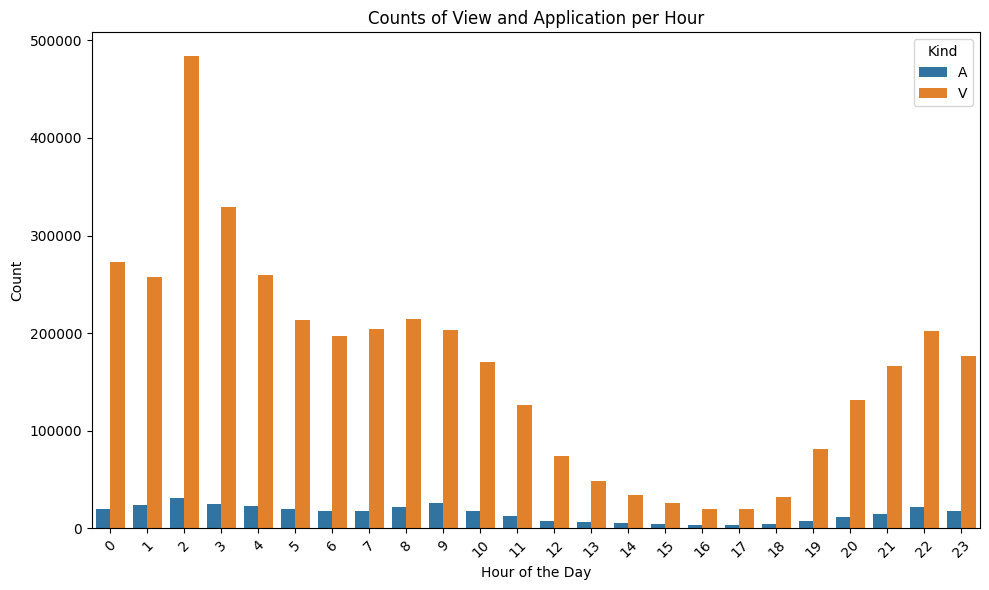

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

merged_data['event_datetime'] = pd.to_datetime(merged_data['event_datetime'])
merged_data['hour'] = merged_data['event_datetime'].dt.hour

# Group by hour and kind, then count occurrences
counts_per_hour = merged_data.groupby(['hour', 'kind']).size().unstack(fill_value=0)

# Reset index to make hour a column
counts_per_hour = counts_per_hour.reset_index()

# Melt the DataFrame for easier visualization
counts_per_hour_melted = counts_per_hour.melt(id_vars='hour', var_name='kind', value_name='count')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=counts_per_hour_melted, x='hour', y='count', hue='kind')
plt.title('Counts of View and Application per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Kind')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It's interesting to note that the majority of users search for jobs by viewing and applying for them during the early hours of the morning.

**2. Count of Views per Resume ID and Count of Applications per Resume ID**

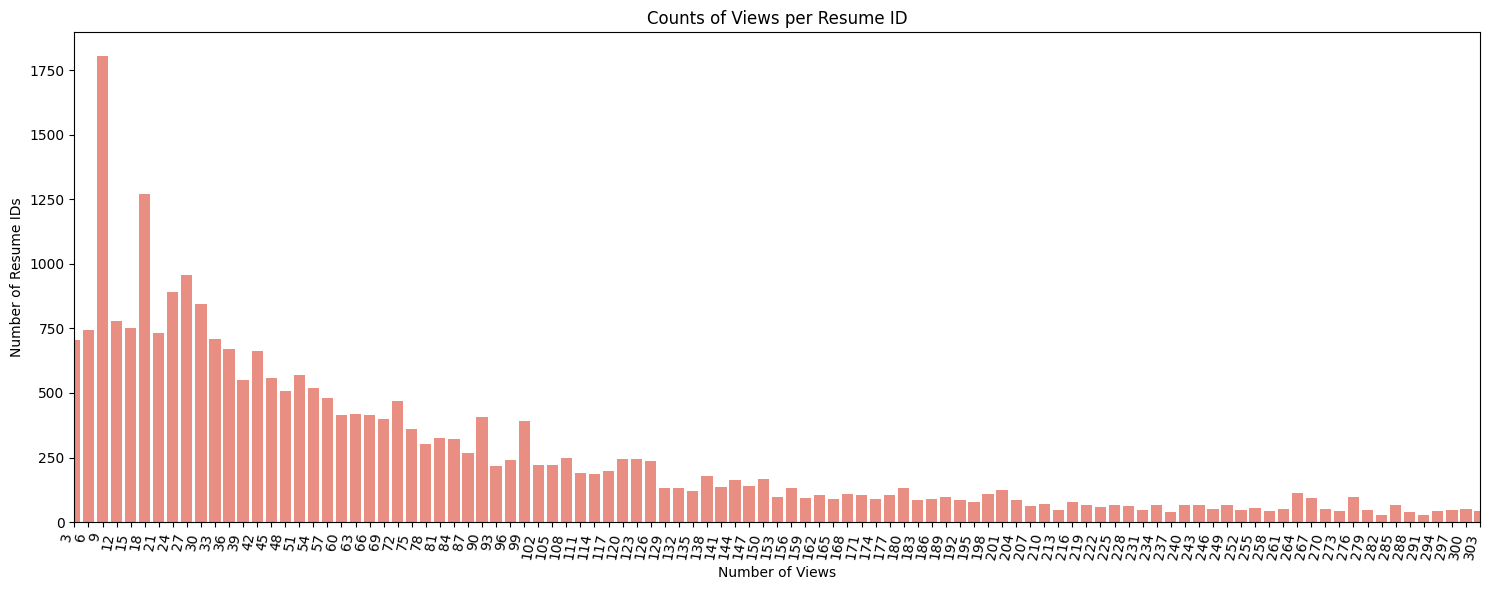

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_data' contains the DataFrame with views data
# Assuming 'resume_id' is the column representing the resume ID

# Group by resume_id and count the number of views
views_count = merged_data[merged_data['kind'] == 'V'].groupby('resume_id').size()

# Binning counts greater than 1000 into a single bin
views_count_binned = views_count.copy()
views_count_binned[views_count_binned > 1000] = 1000

# Count the frequency of each bin
bin_counts = views_count_binned.value_counts().sort_index()

# Plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=bin_counts.index, y=bin_counts.values, color='salmon')
plt.title('Counts of Views per Resume ID')
plt.xlabel('Number of Views')
plt.ylabel('Number of Resume IDs')
plt.xlim(0, 100)
plt.xticks(rotation=80, ha='right')
plt.tight_layout()
plt.show()


In [29]:
views_count = merged_data[merged_data['kind'] == 'V'].groupby('resume_id').size()

# Calculate percentiles
percentiles = views_count.quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

print("Percentiles of Number of Views:")
print(percentiles)

Percentiles of Number of Views:
0.25      24.00
0.50      60.00
0.75     138.00
0.90     309.00
0.95     507.00
0.99    1146.36
dtype: float64


The plot encapsulates the reality logically, as it's realistic to expect that many users would apply for a job once or in smaller numbers. It's unlikely to work the other way around.

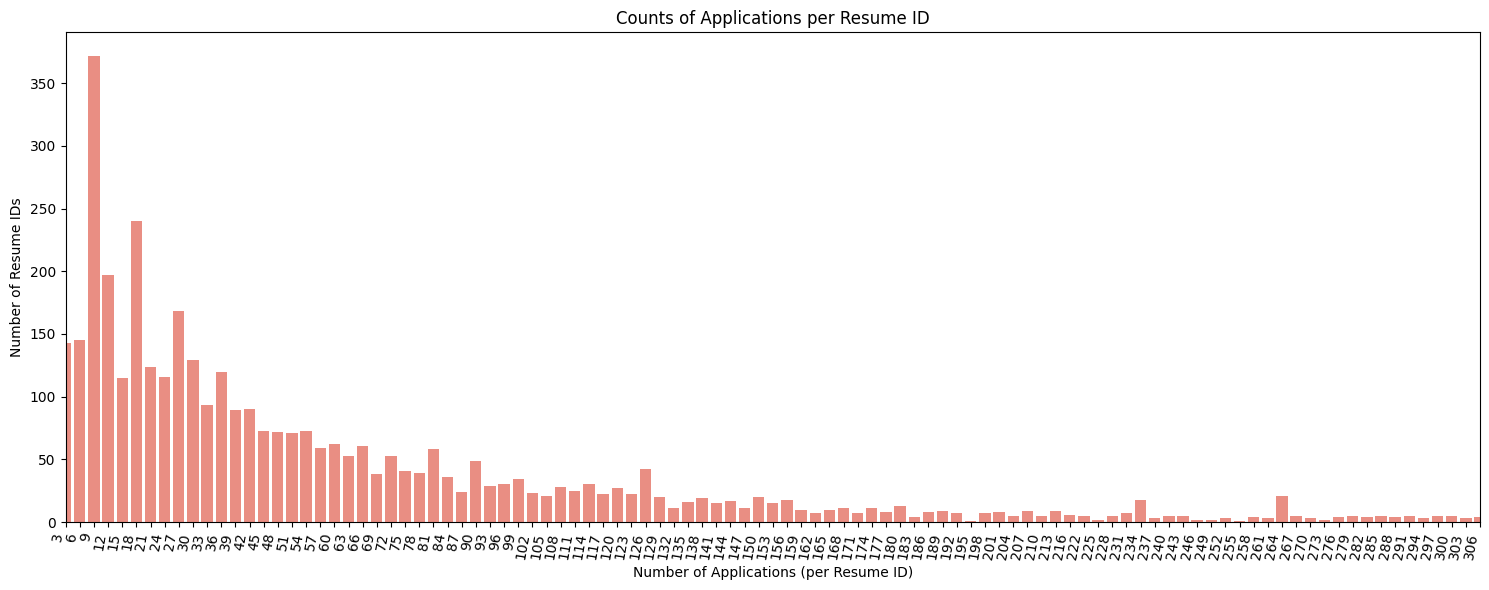

In [46]:
# Assuming 'merged_data' contains the DataFrame with views data
# Assuming 'resume_id' is the column representing the resume ID

# Group by resume_id and count the number of views
app_count = merged_data[merged_data['kind'] == 'A'].groupby('resume_id').size()


# Count the frequency of each bin
app_counts = app_count.value_counts().sort_index()

# Plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=app_counts.index, y=app_counts.values, color='salmon')
plt.title('Counts of Applications per Resume ID')
plt.xlabel('Number of Applications (per Resume ID)')
plt.ylabel('Number of Resume IDs')
plt.xlim(0, 100)  # Limit x-axis from 0 to 100
plt.xticks(rotation=80, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [45]:
# Filter the DataFrame for rows where 'kind' is 'A'
applications_data = merged_data[merged_data['kind'] == 'A']

# Group by 'resume_id' and count the number of applications made by each resume
applications_per_resume = applications_data.groupby('resume_id').size()

# Count the number of resumes that made each number of applications
resume_counts = applications_per_resume.value_counts().sort_index()

# Display the result
print(resume_counts)


3       143
6       145
9       372
12      197
15      115
       ... 
1779      1
1785      1
1905      1
2760      1
3210      1
Length: 235, dtype: int64


In [35]:
# Group by resume_id and count the number of applications
app_count = merged_data[merged_data['kind'] == 'A'].groupby('resume_id').size()

# Calculate percentiles
percentiles = app_count.quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

print("Percentiles of Number of Applications per Resume ID:")
print(percentiles)

Percentiles of Number of Applications per Resume ID:
0.25     18.00
0.50     39.00
0.75     94.50
0.90    212.40
0.95    342.00
0.99    757.74
dtype: float64


**3. Count of Unique Job ID Advertised**

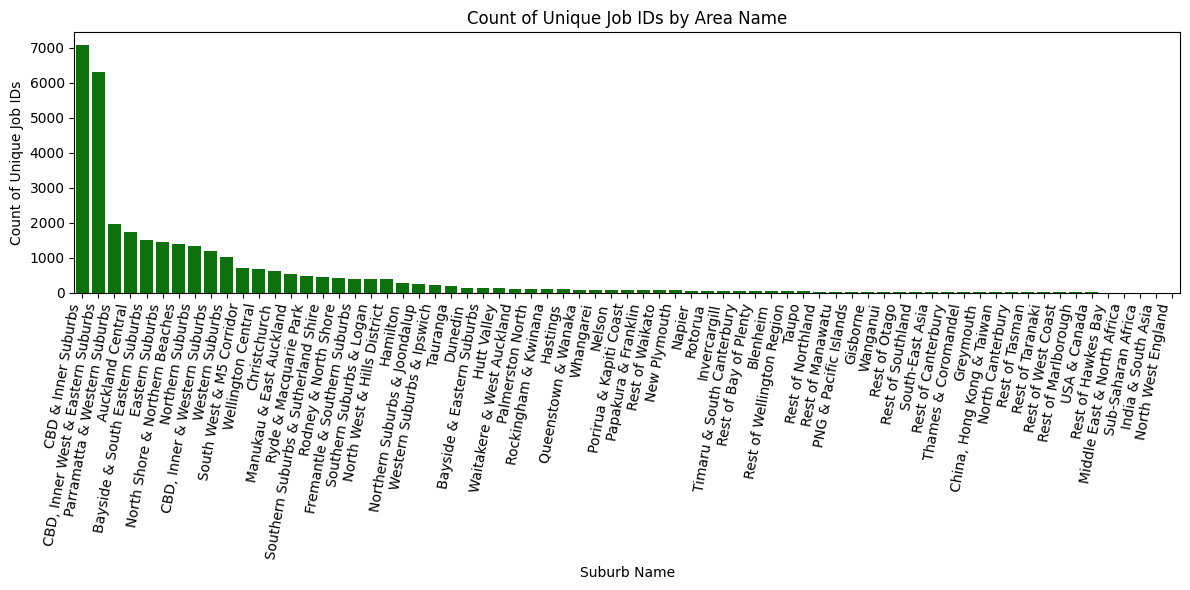

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

area_name_counts = merged_data.groupby('area_name')['job_id'].nunique().reset_index()
area_name_counts.columns = ['area_name', 'unique_job_id_count']

area_name_counts_sorted = area_name_counts.sort_values(by='unique_job_id_count', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=area_name_counts_sorted, x='area_name', y='unique_job_id_count', color='green')
plt.title('Count of Unique Job IDs by Area Name')
plt.xlabel('Suburb Name')
plt.ylabel('Count of Unique Job IDs')
plt.xticks(rotation=80, ha='right')
plt.tight_layout()
plt.show()


In [55]:
merged_data.event_platform.unique()

array(['IOS_APP', 'ANDROID_APP', 'WEB'], dtype=object)

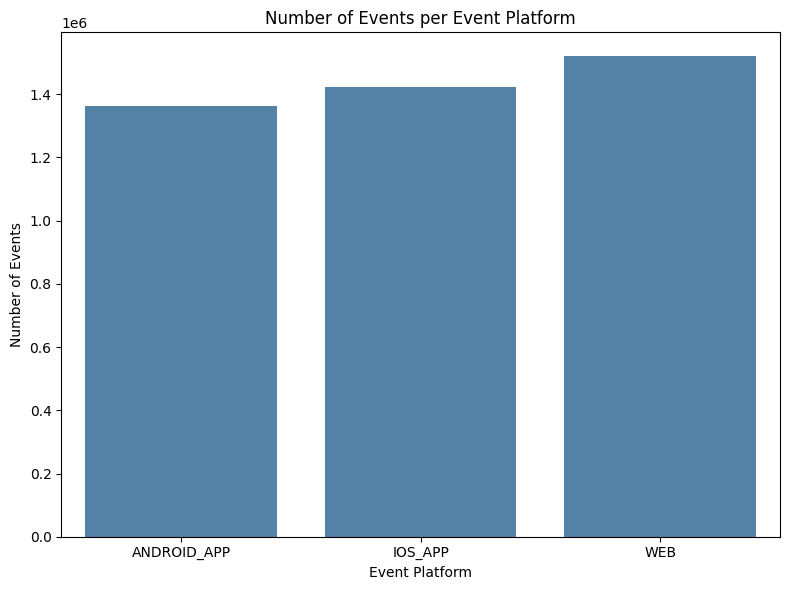

In [58]:
# Group by 'event_platform' and count the number of events for each platform
events_per_platform = merged_data.groupby('event_platform').size()

# Plot the number of events per event platform
plt.figure(figsize=(8, 6))
sns.barplot(x=events_per_platform.index, y=events_per_platform.values, color='steelblue')
plt.title('Number of Events per Event Platform')
plt.xlabel('Event Platform')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()
